# Working with Custom Images

So far everything we've worked with has been nicely formatted for us already by Keras.

Let's explore what its like to work with a more realistic data set.

## The Data

-----------

## PLEASE NOTE: THIS DATASET IS VERY LARGE. IT CAN BE DOWNLOADED FROM THE PREVIOUS LECTURE. PLEASE WATCH THE VIDEO LECTURE ON HOW TO GET THE DATA.

## USE OUR VERSION OF THE DATA. WE ALREADY ORGANIZED IT FOR YOU!!

--------
----------
--------

ORIGINAL DATA SOURCE:

https://www.microsoft.com/en-us/download/confirmation.aspx?id=54765

-----------

The Kaggle Competition: [Cats and Dogs](https://www.kaggle.com/c/dogs-vs-cats-redux-kernels-edition) includes 25,000 images of cats and dogs. We will be building a classifier that works with these images and attempt to detect dogs versus cats!

The pictures are numbered 0-12499 for both cats and dogs, thus we have 12,500 images of Dogs and 12,500 images of Cats. This is a huge dataset!!

--------
----------
------------


**Note: We will be dealing with real image files, NOT numpy arrays. Which means a large part of this process will be learning how to work with and deal with large groups of image files. This is too much data to fit in memory as a numpy array, so we'll need to feed it into our model in batches. **

### Visualizing the Data


-------
Let's take a closer look at the data.

In [1]:
import matplotlib.pyplot as plt
import cv2
# Technically not necessary in newest versions of jupyter
%matplotlib inline

In [2]:
cat4 = cv2.imread('../DATA/CATS_DOGS/train/CAT/4.jpg')
cat4 = cv2.cvtColor(cat4,cv2.COLOR_BGR2RGB)

In [3]:
type(cat4)

numpy.ndarray

In [4]:
cat4.shape

(375, 500, 3)

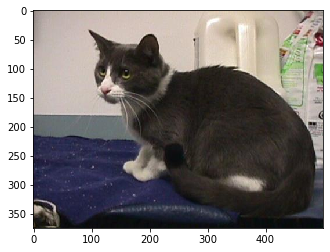

In [5]:
plt.imshow(cat4)

In [6]:
dog2 = cv2.imread('../DATA/CATS_DOGS/train/Dog/2.jpg')
dog2 = cv2.cvtColor(dog2,cv2.COLOR_BGR2RGB)

In [7]:
dog2.shape

(199, 188, 3)

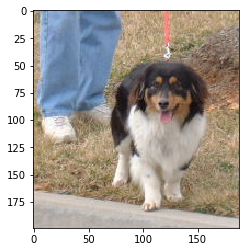

In [8]:
plt.imshow(dog2)

## Preparing the Data for the model

There is too much data for us to read all at once in memory. We can use some built in functions in Keras to automatically process the data, generate a flow of batches from a directory, and also manipulate the images.

### Image Manipulation

Its usually a good idea to manipulate the images with rotation, resizing, and scaling so the model becomes more robust to different images that our data set doesn't have. We can use the **ImageDataGenerator** to do this automatically for us. Check out the documentation for a full list of all the parameters you can use here!

In [9]:
# Funcionalidad para procesar muchas imagenes y por ejemplo, asignarles el mismo tamaño a todos
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [24]:
# Podemos generar tambien imagenes que tengan fluctiaciones aleatorias. Girar, agregar zoom, ver diferentes perfiles, etc..
image_gen = ImageDataGenerator(rotation_range=30, # rotara la imagen 30 aleatoreamente, 30 porque no quiero imagenes al revez
                               width_shift_range=0.1, # Estira la imagen un 10%, redimensionamos
                               height_shift_range=0.1, # Estira la imagen un 10%, redimensionamos
                               rescale=1/255, # Normalizamos, valores entre 0 y 1
                               shear_range=0.2, # Corta un 20% de la imagen
                               zoom_range=0.2, # Acercamos un 20%
                               horizontal_flip=True, # Voltea la imagen horizontal
                               fill_mode='nearest' # Cuando hiramos la iumagen un 30% faltaran pixeles, rellenamos 
                                                   # con los valores mas cercanos
                              )

In [25]:
help(ImageDataGenerator)

Help on class ImageDataGenerator in module keras.preprocessing.image:

class ImageDataGenerator(keras_preprocessing.image.image_data_generator.ImageDataGenerator)
 |  ImageDataGenerator(featurewise_center=False, samplewise_center=False, featurewise_std_normalization=False, samplewise_std_normalization=False, zca_whitening=False, zca_epsilon=1e-06, rotation_range=0, width_shift_range=0.0, height_shift_range=0.0, brightness_range=None, shear_range=0.0, zoom_range=0.0, channel_shift_range=0.0, fill_mode='nearest', cval=0.0, horizontal_flip=False, vertical_flip=False, rescale=None, preprocessing_function=None, data_format='channels_last', validation_split=0.0, interpolation_order=1, dtype='float32')
 |  
 |  Generate batches of tensor image data with real-time data augmentation.
 |   The data will be looped over (in batches).
 |  
 |  # Arguments
 |      featurewise_center: Boolean.
 |          Set input mean to 0 over the dataset, feature-wise.
 |      samplewise_center: Boolean. Set each

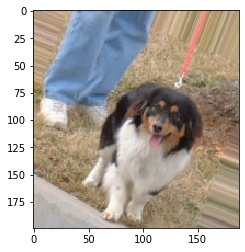

In [11]:
# es un cambio aleatorio, podria girar un 30%, un 25%, un 10%, etc..
# si vuelvo a ejecutar veo la misma imagen del perro pero de diferente formas,
# lo modifica aleatoreamente
plt.imshow(image_gen.random_transform(dog2))

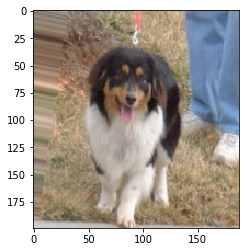

In [12]:
plt.imshow(image_gen.random_transform(dog2))

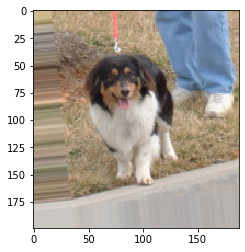

In [13]:
plt.imshow(image_gen.random_transform(dog2))

### Generating many manipulated images from a directory


In order to use .flow_from_directory, you must organize the images in sub-directories. This is an absolute requirement, otherwise the method won't work. The directories should only contain images of one class, so one folder per class of images.

Structure Needed:

* Image Data Folder
    * Class 1
        * 0.jpg
        * 1.jpg
        * ...
    * Class 2
        * 0.jpg
        * 1.jpg
        * ...
    * ...
    * Class n

In [14]:
# De esta manera importamos las imagenes,
# va a tomar la clase o label de la carpeta donde se encuentra la imagen
image_gen.flow_from_directory('../DATA/CATS_DOGS/train')

Found 18743 images belonging to 2 classes.


In [15]:
image_gen.flow_from_directory('../DATA/CATS_DOGS/test')

Found 6251 images belonging to 2 classes.


### Resizing Images

Let's have Keras resize all the images to 150 pixels by 150 pixels once they've been manipulated.

In [16]:
# width,height,channels
image_shape = (150,150,3)

# Creating the Model

In [17]:
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [18]:
model = Sequential()

# (150,150,3) -> elegimos algo que pueda ser mas o menos el promedio de las imagenes
# Como las imagenes son bastante complejas, agregamos 3 capas
model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu')) #Asignamos la activaciob aca, por separado

# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 50% of neurons.
# Ayuda a reducir el sobreajuste (Overfitting), al desactivar neuronas al azar
# apagamos el %50 de las neuronas aleatoriamente
model.add(Dropout(0.5))

# Last layer, remember its binary, 0=cat , 1=dog
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18496)            

### Training the Model

In [20]:
batch_size = 16

train_image_gen = image_gen.flow_from_directory('../DATA/CATS_DOGS/train',
                                               target_size=image_shape[:2], # (150,150) -> le asigno ese tamaño
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 18743 images belonging to 2 classes.


In [21]:
test_image_gen = image_gen.flow_from_directory('../DATA/CATS_DOGS/test',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 6251 images belonging to 2 classes.


In [22]:
train_image_gen.class_indices

{'CAT': 0, 'DOG': 1}

In [23]:
import warnings
warnings.filterwarnings('ignore')

In [24]:
results = model.fit_generator(train_image_gen,epochs=100,
                              steps_per_epoch=150, # Solo tomo 150 imagenes del total por epoch
                              validation_data=test_image_gen,
                             validation_steps=12)

Epoch 1/100
150/150 [==============================] - 75s 499ms/step - loss: 0.6992 - acc: 0.4967 - val_loss: 0.6930 - val_acc: 0.5002
Epoch 2/100
150/150 [==============================] - 53s 354ms/step - loss: 0.6912 - acc: 0.5272 - val_loss: 0.6734 - val_acc: 0.5354
Epoch 3/100
150/150 [==============================] - 54s 361ms/step - loss: 0.6820 - acc: 0.5479 - val_loss: 0.6787 - val_acc: 0.5821
Epoch 4/100
150/150 [==============================] - 54s 359ms/step - loss: 0.6728 - acc: 0.5875 - val_loss: 0.6579 - val_acc: 0.5937
Epoch 5/100
150/150 [==============================] - 54s 357ms/step - loss: 0.6781 - acc: 0.5500 - val_loss: 0.6864 - val_acc: 0.5324
Epoch 6/100
150/150 [==============================] - 53s 350ms/step - loss: 0.6716 - acc: 0.5704 - val_loss: 0.6364 - val_acc: 0.6170
Epoch 7/100
150/150 [==============================] - 52s 347ms/step - loss: 0.6632 - acc: 0.6221 - val_loss: 0.6631 - val_acc: 0.5498
Epoch 8/100
150/150 [===========================

Epoch 61/100
150/150 [==============================] - 40s 266ms/step - loss: 0.4522 - acc: 0.7887 - val_loss: 0.4725 - val_acc: 0.7720
Epoch 62/100
150/150 [==============================] - 40s 267ms/step - loss: 0.4444 - acc: 0.8000 - val_loss: 0.4361 - val_acc: 0.7970
Epoch 63/100
150/150 [==============================] - 40s 266ms/step - loss: 0.4585 - acc: 0.7867 - val_loss: 0.4214 - val_acc: 0.8088
Epoch 64/100
150/150 [==============================] - 40s 266ms/step - loss: 0.4341 - acc: 0.7925 - val_loss: 0.4292 - val_acc: 0.8084
Epoch 65/100
150/150 [==============================] - 40s 265ms/step - loss: 0.4403 - acc: 0.8074 - val_loss: 0.4410 - val_acc: 0.7986
Epoch 66/100
150/150 [==============================] - 40s 266ms/step - loss: 0.4512 - acc: 0.8004 - val_loss: 0.4295 - val_acc: 0.8069
Epoch 67/100
150/150 [==============================] - 40s 266ms/step - loss: 0.4210 - acc: 0.8079 - val_loss: 0.5101 - val_acc: 0.7738
Epoch 68/100
150/150 [===================

In [25]:
# model.save('cat_dog2.h5')

# Evaluating the Model

In [26]:
# historico de todos los epochs que se ejecutaron
results.history['acc']

[0.49666666666666665,
 0.5286491008133432,
 0.5479166666666667,
 0.5875,
 0.55,
 0.5704166666666667,
 0.6220833333333333,
 0.6058333333333333,
 0.6029166666666667,
 0.6333333333333333,
 0.6354166666666666,
 0.6616666666666666,
 0.6591666666666667,
 0.6587202007777518,
 0.67,
 0.665,
 0.6933333333333334,
 0.6800501882556291,
 0.6779166666666666,
 0.7020833333333333,
 0.6916666666666667,
 0.6904166666666667,
 0.7016666666666667,
 0.7254166666666667,
 0.72125,
 0.7075,
 0.745,
 0.7029166666666666,
 0.7329166666666667,
 0.7168548725130965,
 0.7354166666666667,
 0.7529166666666667,
 0.7383333333333333,
 0.7483333333333333,
 0.7420833333333333,
 0.72625,
 0.7454166666666666,
 0.7529166666666667,
 0.7590966123210392,
 0.7720618988619046,
 0.7566666666666667,
 0.7458333333333333,
 0.7570833333333333,
 0.7579166666666667,
 0.7520833333333333,
 0.7629166666666667,
 0.7670833333333333,
 0.7691342534504392,
 0.7875,
 0.7845833333333333,
 0.8,
 0.7695833333333333,
 0.7829166666666667,
 0.7754166666

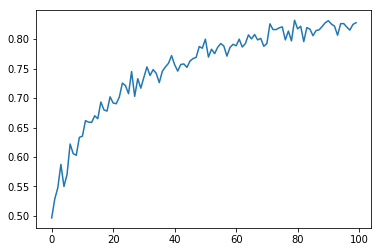

In [27]:
plt.plot(results.history['acc'])

In [28]:
# model.save('cat_dog_100epochs.h5')

# Predicting on new images

In [29]:
train_image_gen.class_indices

{'CAT': 0, 'DOG': 1}

In [33]:
import numpy as np
from keras.preprocessing import image

dog_file = '../DATA/CATS_DOGS/train/Dog/2.jpg'

dog_img = image.load_img(dog_file, target_size=(150, 150)) # Cambiamos el tamaño a 150x150

dog_img = image.img_to_array(dog_img)

# (150,150,3)
dog_img = np.expand_dims(dog_img, axis=0)
# (1, 150,150,3) -> Para que sepa que es un lote solo

dog_img = dog_img/255

In [34]:

model.predict_classes(dog_img) # 0=cat , 1=dog
prediction_prob = model.predict(dog_img)

In [35]:
# Output prediction
print(f'Probability that image is a dog is: {prediction_prob} ')

Probability that image is a dog is: [[0.97995687]] 


# Great Job!